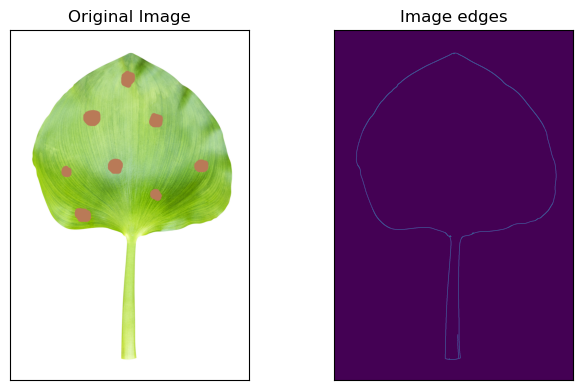

In [10]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image from disk.
# img = cv2.imread('leaf.jpg')
img = cv2.imread('water-hyacinth-leaf-with-scars.png')
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Canny edge detection
edges = cv2.Canny(image= image_rgb, threshold1=100, threshold2=700)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(edges)
axs[1].set_title('Image edges')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()

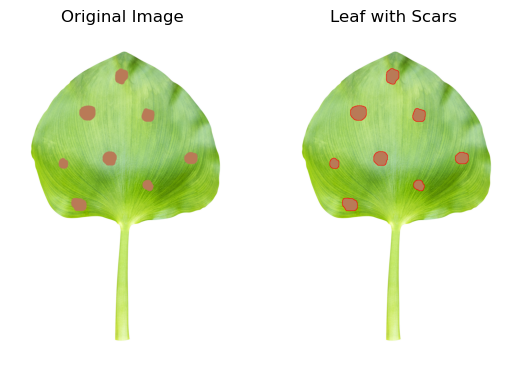

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Leaf-with-scars-1.png')

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Convert image to HSV color space for better color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range for detecting brown scars
lower_brown = np.array([10, 100, 20])
upper_brown = np.array([20, 255, 200])

# Create a mask for brown color
mask = cv2.inRange(hsv, lower_brown, upper_brown)

# Bitwise-AND mask and original image to keep only the brown parts (scars)
scar_result = cv2.bitwise_and(image, image, mask=mask)

# Find contours in the mask (scars)
scar_contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw scar contours on the original image
cv2.drawContours(image, scar_contours, -1, (0, 0, 255), 2)

# Show the image with the identified scars
# cv2.imshow('Leaf with Scars', image)
# cv2.waitKey(0)

# Save the result with scars highlighted
# cv2.imwrite('leaf_with_scars.jpg', image)

cv2.destroyAllWindows()

# Display the segmented image
plt.subplot(1, 2, 2)
plt.title('Leaf with Scars')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

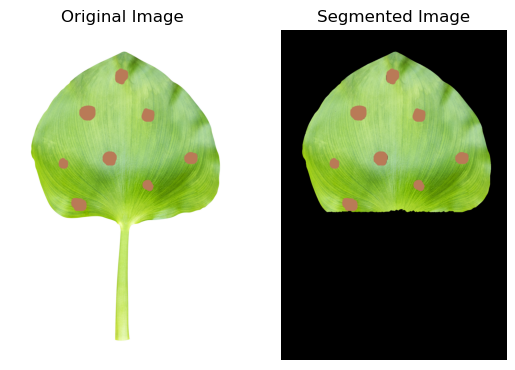

In [16]:
# Python program to illustrate foreground extraction using GrabCut algorithm

# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt

# path to input image specified and 
# image is loaded with imread command
# image = cv2.imread('leaf.jpg')
image = cv2.imread('Leaf-with-scars-1.png')

# create a simple mask image similar
# to the loaded image, with the 
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)

# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images
rectangle = (0, 100, 1280, 960)

# apply the grabcut algorithm with appropriate
# values as parameters, number of iterations = 3 
# cv2.GC_INIT_WITH_RECT is used because
# of the rectangle mode is used 
cv2.grabCut(image, mask, rectangle, 
			backgroundModel, foregroundModel,
			3, cv2.GC_INIT_WITH_RECT)

# In the new mask image, pixels will 
# be marked with four flags 
# four flags denote the background / foreground 
# mask is changed, all the 0 and 2 pixels 
# are converted to the background
# mask is changed, all the 1 and 3 pixels
# are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

# The final mask is multiplied with 
# the input image to give the segmented image.
image_segmented = image * mask2[:, :, np.newaxis]

# output segmented image with colorbar
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

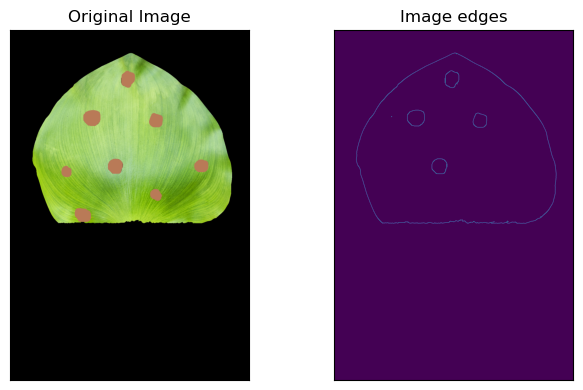

In [17]:
from matplotlib import pyplot as plt

image_rgb = cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB)

# Apply Canny edge detection
edges = cv2.Canny(image= image_rgb, threshold1=100, threshold2=700)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(edges)
axs[1].set_title('Image edges')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()